In [1]:
'''

Use Autoencoder to implement anomaly detection. Build the model by using:
a. Import required libraries
b. Upload / access the dataset
c. Encoder converts it into latent representation
d. Decoder networks convert it back to the original input
e. Compile the models with Optimizer, Loss, and Evaluation Metrics
'''

'\n\nUse Autoencoder to implement anomaly detection. Build the model by using:\na. Import required libraries\nb. Upload / access the dataset\nc. Encoder converts it into latent representation\nd. Decoder networks convert it back to the original input\ne. Compile the models with Optimizer, Loss, and Evaluation Metrics\n'

In [13]:
#a.Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [6]:
#b. Upload / access the dataset
dataset = pd.read_csv("creditcard.csv")

In [7]:

# Preprocess the data (if needed)
# You may need to normalize the data, handle missing values, etc.
# For simplicity, we'll perform normalization in this example
# Normalize the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X = scaler.fit_transform(dataset.drop("Class", axis=1))
y = dataset["Class"]

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Build and train the Autoencoder model
input_dim = X_train.shape[1]

In [10]:
#c. Encoder converts it into latent representation
# Encoder
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu')
])


In [11]:
#dd. Decoder networks convert it back to the original input
# Decoder
decoder = models.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Using 'linear' activation for reconstruction
])

# Autoencoder
autoencoder = models.Sequential([
    encoder,
    decoder
])

In [12]:
#e. Compile the models with Optimizer, Loss, and Evaluation Metrics
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.2954 - val_loss: 0.1529
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.1197 - val_loss: 0.1081
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.0856 - val_loss: 0.0695
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0702 - val_loss: 0.0592
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.0615 - val_loss: 0.0544
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.0555 - val_loss: 0.0562
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.0509 - val_loss: 0.0713
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0485 - val_loss: 0.0458
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 0.0473 - val_loss: 0.0442
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.0463 - val_loss: 0.0464


In [14]:

# Detect anomalies and tune the threshold
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


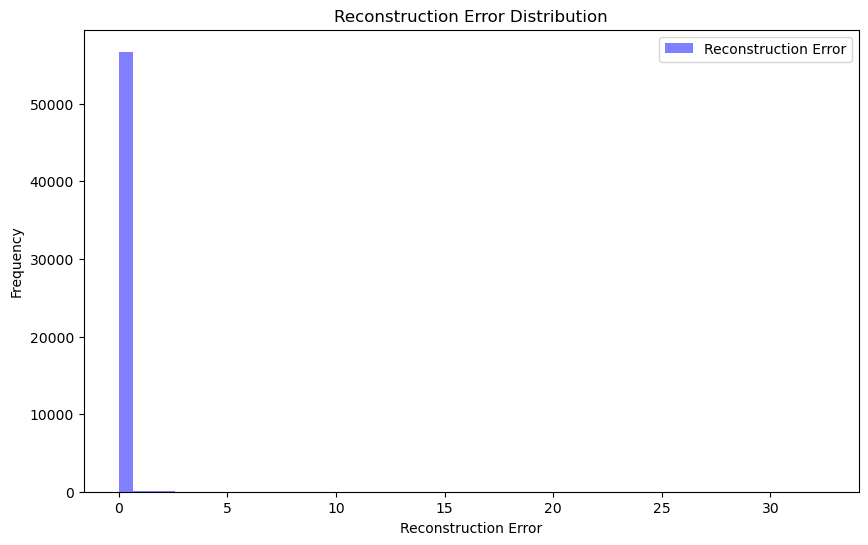

In [15]:

# Visualize the reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.5, color='b', label='Reconstruction Error')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

In [16]:
# Threshold tuning (iterate and adjust as needed)
thresholds = np.arange(0.1, 1.0, 0.1)  # Adjust the step size as needed

for threshold in thresholds:
    anomalies = mse > threshold

In [17]:
# Count the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Threshold: {threshold:.1f}, Number of anomalies: {num_anomalies}")

Threshold: 0.9, Number of anomalies: 203


In [18]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, anomalies))

print("\nClassification Report:")
print(classification_report(y_test, anomalies))

Confusion Matrix:
[[56727   137]
 [   32    66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.67      0.44        98

    accuracy                           1.00     56962
   macro avg       0.66      0.84      0.72     56962
weighted avg       1.00      1.00      1.00     56962



In [19]:
import seaborn as sns

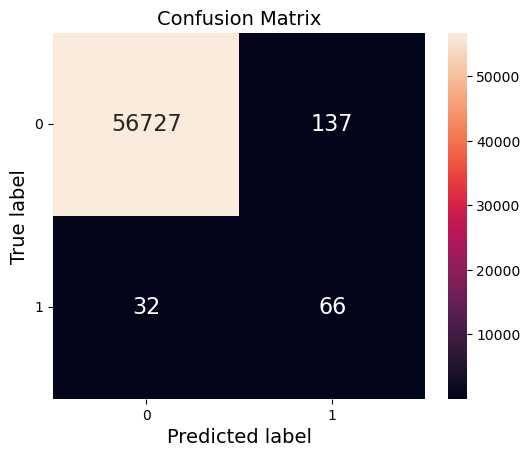

In [20]:
plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(y_test, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')
plt.xticks([0.5, 1.5],  rotation = 'horizontal')
plt.yticks([0.5, 1.5],  rotation = 'horizontal')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()